# Cars with Lower than Average MSRP and Higher than Average City MPG

In [1]:
%let rc = %sysfunc(filename(fr,.));
%let curdir = %sysfunc(pathname(&fr));
%let rc = %sysfunc(filename(fr));

%let path = &curdir;
libname xl "&path\data\cars.xlsx";

SAS Connection established. Subprocess id is 24716


9                                                          The SAS System                             14:16 Thursday, April 28, 2022

44         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
44       ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
45         
46         %let rc = %sysfunc(filename(fr,.));
47         %let curdir = %sysfunc(pathname(&fr));
48         %let rc = %sysfunc(filename(fr));
49         
50         %let path = &curdir;
51         libname xl "&path\data\cars.xlsx";
NOTE: Libref XL was successfully assigned as follows: 
      Engine:        EXCEL 
      Physical Name: C:\Users\pestyl\OneDrive - SAS\github repos\Data Projects\Cars With Lower than Average MSRP and Higher than 
      Average City MPG\data\cars.xlsx
52         
53         
54         ods html5 (id=saspy_internal) close;ods listing;
55  

In [2]:
proc print data=xl.cars(obs=10);
run;

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6,225,18,24,3880,115,197
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100,41100,3.5,6,225,18,24,3893,115,197
7,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765,79978,3.2,6,290,17,24,3153,100,174
8,Audi,A4 1.8T 4dr,Sedan,Europe,Front,25940,23508,1.8,4,170,22,31,3252,104,179
9,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,35940,32506,1.8,4,170,23,30,3638,105,180
10,Audi,A4 3.0 4dr,Sedan,Europe,Front,31840,28846,3.0,6,220,20,28,3462,104,179


In [3]:
*****************************;
* Create the CARS Table     *;
*****************************;
data cars;
    set xl.cars;
    if MPG_City > 20 and MSRP < 32775 then Car='High MPG, Low Cost';
        else Car='Low MPG, High Cost';
    keep MSRP MPG_City Car;
run;

proc print data=cars(obs=10) noobs;
run;

MSRP,MPG_City,Car
36945,17,"Low MPG, High Cost"
23820,24,"High MPG, Low Cost"
26990,22,"High MPG, Low Cost"
33195,20,"Low MPG, High Cost"
43755,18,"Low MPG, High Cost"
46100,18,"Low MPG, High Cost"
89765,17,"Low MPG, High Cost"
25940,22,"High MPG, Low Cost"
35940,23,"Low MPG, High Cost"
31840,20,"Low MPG, High Cost"


In [4]:
*******************************;
* Create the Annotation Table *;
*******************************;
%sganno
;

data mpgByCost;
    %sgLine(reset='all', X1=20, Y1=0, X2=20, Y2=32775, 
            DrawSpace='DataValue', LineColor='cx012036');
    %sgLine(reset='all', X1=20, Y1=32775, X2=100, Y2=32775, 
            DrawSpace='DataValue', X2Space='WallPercent', LineColor='cx012036');
    %sgText(reset='all', X1=40, Y1=39000, DrawSpace='DataValue', Label='MSRP $32,775', 
            Width=100, TextSize=12, TextColor='cx012036');
    %sgText(reset='all', X1=15, Y1=7000, DrawSpace='DataValue', Label='MPG City 20', 
            Width=100, TextSize=12, TextColor='cx012036');
run;

proc print data=mpgByCost noobs;
run;

DRAWSPACE,FUNCTION,LABEL,LINECOLOR,TEXTCOLOR,X2SPACE,TEXTSIZE,WIDTH,X1,X2,Y1,Y2
DataValue,LINE,,cx012036,,,.,.,20,20,0,32775
DataValue,LINE,,cx012036,,WallPercent,.,.,20,100,32775,32775
DataValue,TEXT,"MSRP $32,775",,cx012036,,12,100,40,.,39000,.
DataValue,TEXT,MPG City 20,,cx012036,,12,100,15,.,7000,.



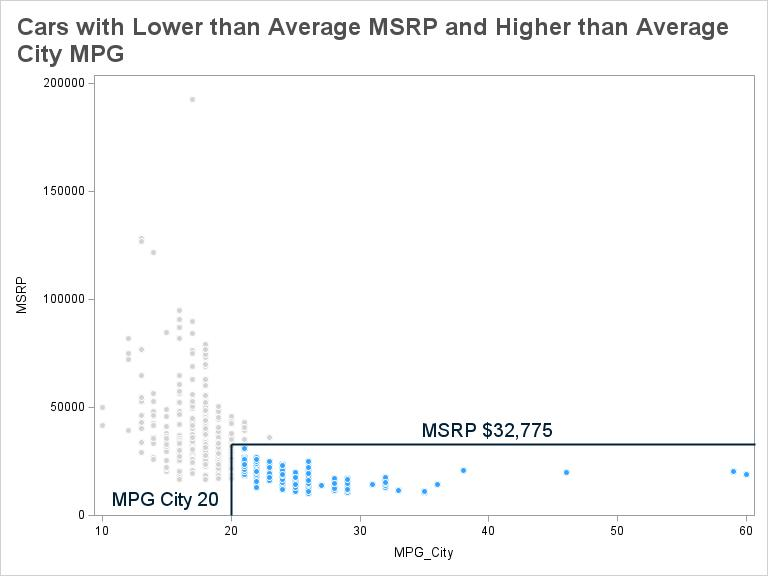

In [5]:
ods listing gpath="&path/images";
ods graphics / width=8in imagename="cars" imagefmt=jpeg;


title height=16pt justify=left color=charcoal 
      'Cars with Lower than Average MSRP and Higher than Average City MPG';
proc sgplot data=cars
            sganno=mpgByCost 
            noautolegend;
    scatter x=MPG_City y=MSRP
            / group=Car
              markerattrs=(symbol=CircleFilled)
              markeroutlineattrs=(color=white thickness=.5px)
              filledoutlinedmarkers;
    yaxis offsetmin=0;
    styleattrs datacolors=(LightGray cx33a3ff);
run;
title;